In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import logging
import matplotlib.pyplot as plt

In [4]:
import sys
import os

# Go up one directory from notebooks/ → project root
PROJECT_ROOT = os.path.abspath("..")

# Build path to the CSV
data_path = os.path.join(PROJECT_ROOT, "data", "raw", "AmesHousing.csv")

# SRC_PATH is a variable assigned to the location of src
SRC_PATH = os.path.join(PROJECT_ROOT, "src")
# Add src/ to sys.path (so Python knows where to look)
sys.path.append(SRC_PATH)




In [5]:
# from file_utils import load_data
from file_utils import load_data, missing_values_report


# Load data
data = load_data(data_path)
print(data.head())
logging.info("Dataset loaded successfully")


   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

In [6]:
import file_utils
dir(file_utils)


['LOG_DIR',
 'PROJECT_ROOT',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'check_duplicates',
 'load_data',
 'logging',
 'missing_values_report',
 'np',
 'os',
 'pd']

In [9]:
data.shape

(2930, 82)

In [10]:
data.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [7]:
data.dtypes

Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 82, dtype: object

In [8]:
data.memory_usage(deep=True).sum()

7251298

# missing values report

In [11]:
# Step 1: Count missing values per column
missing = data.isna().sum().rename("n_missing").to_frame()
# Step 2: Add percentage of missing values
missing["pct_missing"] = (missing["n_missing"] / len(missing) * 100).round(3)
# Step 3: Add column data types
missing["dtype"] = data.dtypes
# Step 4: Add number of unique values
missing["n_unique"] = data.nunique(dropna=True)
# Step 5: Sort by missing percentage
missing_sorted = missing.sort_values("pct_missing", ascending=False)
# Step 6: Show the top 20
missing_sorted.head(20)

,n_missing,pct_missing,dtype,n_unique
Pool QC,2917,3557.317,object,4
Misc Feature,2824,3443.902,object,5
Alley,2732,3331.707,object,2
Fence,2358,2875.610,object,4
Mas Vnr Type,1775,2164.634,object,4
Fireplace Qu,1422,1734.146,object,5
Lot Frontage,490,597.561,float64,128
Garage Cond,159,193.902,object,5
Garage Finish,159,193.902,object,3
Garage Yr Blt,159,193.902,float64,103


In [12]:
print(data["Alley"].unique())
print(data["Fireplace Qu"].unique())
print(data["Pool QC"].unique())

[nan 'Pave' 'Grvl']
['Gd' nan 'TA' 'Po' 'Ex' 'Fa']
[nan 'Ex' 'Gd' 'TA' 'Fa']


#  categorical profiling report

In [7]:
categorical_cols = [col for col in data.columns if data[col].dtypes == "object"]

summary = []

for col in categorical_cols:
    n_missing = data[col].isna().sum()
    pct_missing = round(n_missing / len(data[col]) * 100, 3)
    n_unique = data[col].nunique()
    categories = data[col].unique()

    summary.append(
        {
            "columns": col,
            "n_missing": n_missing,
            "pct_missing": pct_missing,
            "n_unique": n_unique,
            "categories": categories
        }
    )

final = pd.DataFrame(summary).head(5)
print(final)

        columns  n_missing  pct_missing  n_unique  \
0     MS Zoning          0        0.000         7   
1        Street          0        0.000         2   
2         Alley       2732       93.242         2   
3     Lot Shape          0        0.000         4   
4  Land Contour          0        0.000         4   

                                    categories  
0  [RL, RH, FV, RM, C (all), I (all), A (agr)]  
1                                 [Pave, Grvl]  
2                            [nan, Pave, Grvl]  
3                         [IR1, Reg, IR2, IR3]  
4                         [Lvl, HLS, Bnk, Low]  


# numerical profiling report

In [8]:
# the below also possble but we will use pandas method after the below
# stat_col = [scol for scol in data.columns if data[scol].dtypes in ("int64", "float64")]

#using method in pandas

stats_col = data.select_dtypes(include=["int", "float"])

pre_final = []

for i in stats_col:
    n_missings = data[i].isna().sum()
    pct_missings = round(n_missings/ len(data[i]) * 100, 3)
    mean = data[i].mean()
    median = data[i].median()
    std = data[i].std()
    mins = data[i].min()
    maxs = data[i].max()
    Q1 = data[i].quantile(0.25)
    Q2 = data[i].quantile(0.50)
    Q3 = data[i].quantile(0.75)
    unique_n = data[i].nunique()

    pre_final.append(
        {
            "column": i,
            "stat_n_missing" : n_missings,
            "stat_pct_missing" : pct_missings,
            "mean": mean,
            "median" : median,
            "std": std,
            "min": mins,
            "max": maxs,
            "quartile_25": Q1,
            "quartile_50": Q2,
            "quartile_75": Q3,
            "n_unique": unique_n
        }
    )

final = pd.DataFrame(pre_final)
print(final.head(5))

         column  stat_n_missing  stat_pct_missing          mean       median  \
0         Order               0             0.000  1.465500e+03       1465.5   
1           PID               0             0.000  7.144645e+08  535453620.0   
2   MS SubClass               0             0.000  5.738737e+01         50.0   
3  Lot Frontage             490            16.724  6.922459e+01         68.0   
4      Lot Area               0             0.000  1.014792e+04       9436.5   

            std          min           max   quartile_25  quartile_50  \
0  8.459625e+02          1.0  2.930000e+03  7.332500e+02       1465.5   
1  1.887308e+08  526301100.0  1.007100e+09  5.284770e+08  535453620.0   
2  4.263802e+01         20.0  1.900000e+02  2.000000e+01         50.0   
3  2.336533e+01         21.0  3.130000e+02  5.800000e+01         68.0   
4  7.880018e+03       1300.0  2.152450e+05  7.440250e+03       9436.5   

    quartile_75  n_unique  
0  2.197750e+03      2930  
1  9.071811e+08      293

In [9]:
# a tool that helps us automate the profiling stage. the missing values, Data quality
import sweetviz as sv

/home/bonson/Desktop/mljourney/tempo/week03/week03_project/eda_dashboard/fvenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
analyze_report = sv.analyze(data)
analyze_report.show_html("analyze.html", open_browser=True)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:04 -> (00:00 left)

Report analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Opening in existing browser session.


In [19]:
# import IPython
# IPython.display.HTML("analyze.html")

In [ ]:
# To automate the profiling step. the missing value, duplicates, stats values

from ydata_profiling import ProfileReport

profile = ProfileReport(data, title="Pandas Profiling Report", explorative=True)
profile.to_file("profile.html")


Export report to file: 100%|██████████| 1/1 [00:00<00:00,  8.23it/s]


In [ ]:
# we import webbrowser to display the html created by ydata_profiling
import webbrowser
webbrowser.open("profile.html")


True

Gtk-Message: 18:47:50.333: Not loading module "atk-bridge": The functionality is provided by GTK natively. Please try to not load it.
Gtk-Message: 18:47:50.490: Failed to load module "canberra-gtk-module"
Gtk-Message: 18:47:50.493: Failed to load module "canberra-gtk-module"
[84235:84235:0904/184750.613412:ERROR:dbus/object_proxy.cc:590] Failed to call method: org.freedesktop.Secret.Service.ReadAlias: object_path= /org/freedesktop/secrets: org.freedesktop.DBus.Error.AccessDenied: An AppArmor policy prevents this sender from sending this message to this recipient; type="method_call", sender=":1.2602" (uid=1000 pid=84235 comm="/snap/brave/539/opt/brave.com/brave/brave /home/bo" label="snap.brave.brave (enforce)") interface="org.freedesktop.Secret.Service" member="ReadAlias" error name="(unset)" requested_reply="0" destination="org.freedesktop.secrets" (uid=1000 pid=2981 comm="/usr/bin/gnome-keyring-daemon --foreground --compo" label="unconfined")
[84235:84235:0904/184750.625044:ERROR:../

## looking for duplicates

In [8]:
data.duplicated(keep=False).sum()

0

In [10]:
data["PID"].duplicated(keep=False).sum()

0

## Outlier


In [10]:
stats_col = data.select_dtypes(include=["int", "float"])

pre_final = []

for i in stats_col:
    n_missings = data[i].isna().sum()
    pct_missings = round(n_missings/ len(data[i]) * 100, 3)
    mean = data[i].mean()
    median = data[i].median()
    std = data[i].std()
    mins = data[i].min()
    maxs = data[i].max()
    quartile_25 = data[i].quantile(0.25)
    quartile_50 = data[i].quantile(0.50)
    quartile_75 = data[i].quantile(0.75)
    unique_n = data[i].nunique()

    # 🔹 New: Outlier stats
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    n_outliers = ((data[i] < lower_bound) | (data[i] > upper_bound)).sum()

    pre_final.append(
        {
            "column": i,
            "stat_n_missing" : n_missings,
            "stat_pct_missing" : pct_missings,
            "mean": mean,
            "median" : median,
            "std": std,
            "min": mins,
            "max": maxs,
            "quartile_25": Q1,
            "quartile_50": Q2,
            "quartile_75": Q3,
            "n_unique": unique_n,
            # 🔹 Additions
            "IQR": IQR,
            "lower_bound": lower_bound,
            "upper_bound": upper_bound,
            "n_outliers": n_outliers
        }
    )

final = pd.DataFrame(pre_final)
print(final.head(5))


         column  stat_n_missing  stat_pct_missing          mean       median  \
0         Order               0             0.000  1.465500e+03       1465.5   
1           PID               0             0.000  7.144645e+08  535453620.0   
2   MS SubClass               0             0.000  5.738737e+01         50.0   
3  Lot Frontage             490            16.724  6.922459e+01         68.0   
4      Lot Area               0             0.000  1.014792e+04       9436.5   

            std          min           max  quartile_25  quartile_50  \
0  8.459625e+02          1.0  2.930000e+03     129500.0     160000.0   
1  1.887308e+08  526301100.0  1.007100e+09     129500.0     160000.0   
2  4.263802e+01         20.0  1.900000e+02     129500.0     160000.0   
3  2.336533e+01         21.0  3.130000e+02     129500.0     160000.0   
4  7.880018e+03       1300.0  2.152450e+05     129500.0     160000.0   

   quartile_75  n_unique      IQR  lower_bound  upper_bound  n_outliers  
0     213500

# visualization

In [13]:
# to see the correlation each numeric value has to seleprice
# Correlation numbers (like you printed) only tell you the strength and direction of a relationship.


data.corr(numeric_only=True)["SalePrice"].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Order             -0.031408
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0

# now we explore relationships between variables and the target using visualizations (e.g., scatterplots for numeric, boxplots for categorical).

## Scatterplots show the shape of that relationship.

- Is it linear?

- Are there clusters?

- Are there outliers pulling the correlation?

## Think of it like this: correlation is the summary headline, scatterplot is the full story.

In [25]:
# 1. Scatterplot

# ✅ Use when: both variables are continuous numbers (e.g., Gr Liv Area vs SalePrice).

# Example: Does more living area lead to higher prices?

# ✅ Great for spotting:

# Linear or nonlinear trends

# Clusters or groups

# Outliers (points far away from the cloud)

# ❌ Don’t use when one variable is categorical/discrete with very few levels (like Overall Qual 1–10).

# Why? → You’ll get vertical “stacks” of points instead of meaningful spread.

# 2. Boxplot

# ✅ Use when: X is categorical or discrete (like Overall Qual, Neighborhood, Full Bath), and Y is continuous (SalePrice).

# Example: How does price vary across quality levels?

# ✅ Great for:

# Comparing medians across groups

# Seeing spread (interquartile range)

# Spotting outliers within each category

# ❌ Don’t use when both variables are continuous — it oversimplifies the relationship into bins.

# 3. Violin Plot

# ✅ Same as boxplot but goes further → shows the full distribution (density) within each category.

# Example: Within quality 7 houses, are most prices clustered tightly or spread out?

# ✅ Good when you want to see shape of data, not just summary stats.

# ❌ Don’t use if you only care about medians or if dataset is very small → violins can look misleading.

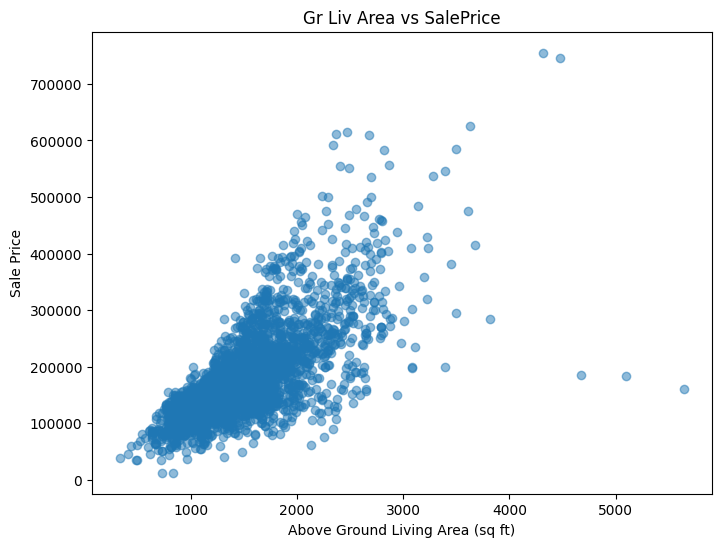

In [14]:
import matplotlib.pyplot as plt  # matplotlib is the go-to plotting library in Python

# Create a new figure (canvas) with size 8 inches wide, 6 inches tall
plt.figure(figsize=(8,6))

# Make a scatter plot
# - x-axis: data["Gr Liv Area"] (living area in sq ft)
# - y-axis: data["SalePrice"] (target variable, house price)
# - alpha=0.5 makes points semi-transparent so overlapping points are visible
plt.scatter(data["Gr Liv Area"], data["SalePrice"], alpha=0.5)

# Label the x-axis to explain what the horizontal numbers mean
plt.xlabel("Above Ground Living Area (sq ft)")

# Label the y-axis to explain what the vertical numbers mean
plt.ylabel("Sale Price")

# Add a title to the chart so viewers immediately understand what is being shown
plt.title("Gr Liv Area vs SalePrice")

# Actually render the chart on the screen (without this, nothing displays)
plt.show()


/tmp/ipykernel_12536/556125899.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["Overall Qual"], y=data["SalePrice"], order=sorted(data["Overall Qual"].unique()), palette="viridis")


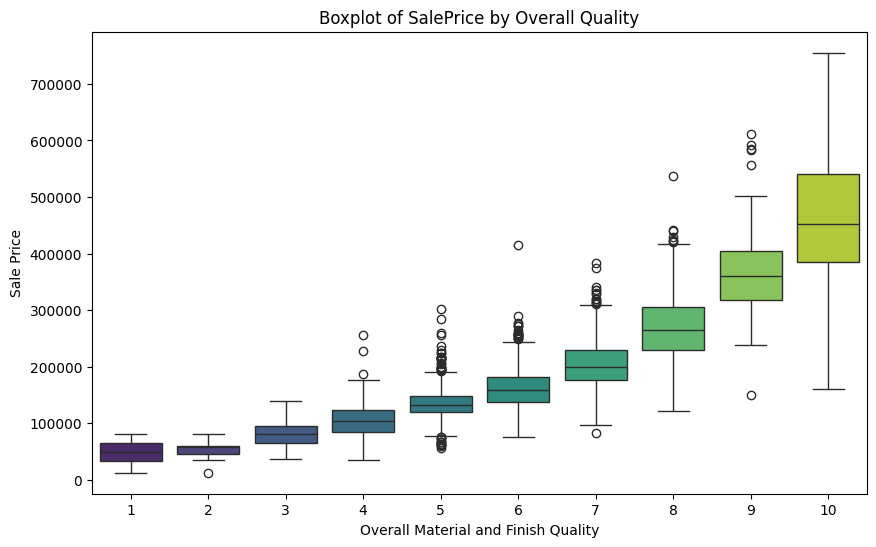

In [16]:
# Create a new figure with a specific size
plt.figure(figsize=(10,6))

# Create a boxplot
# - x-axis: data["Overall Qual"] (categorical quality rating of the house)
# - y-axis: data["SalePrice"] (target variable, price)
# - order=sorted(data["Overall Qual"].unique()) ensures the boxes appear in order
# - palette="viridis" changes the color scheme (optional, for aesthetics)
sns.boxplot(x=data["Overall Qual"], y=data["SalePrice"], order=sorted(data["Overall Qual"].unique()), palette="viridis")

# Label the x-axis (the categories of quality)
plt.xlabel("Overall Material and Finish Quality")

# Label the y-axis (the sale prices corresponding to each quality level)
plt.ylabel("Sale Price")

# Add a title to explain what’s being compared
plt.title("Boxplot of SalePrice by Overall Quality")

# Render the chart
plt.show()


In [19]:
lower_bound = Q1 - 1.5 * IQR            # lower cutoff
upper_bound = Q3 + 1.5 * IQR            # upper cutoff

# Use the bounds you already calculated earlier
outliers = (data["SalePrice"] < lower_bound) | (data["SalePrice"] > upper_bound)

# Count how many outliers
print(f"Number of outliers in SalePrice: {outliers.sum()}")

# Inspect the first few outliers
print(data.loc[outliers, ["SalePrice", "Gr Liv Area", "Overall Qual"]].head(10))


Number of outliers in SalePrice: 137
     SalePrice  Gr Liv Area  Overall Qual
15      538000         3279             8
17      394432         1856             9
36      376162         2334             9
38      395192         1940             9
44      611657         2364             9
46      500000         2696             9
60      355000         2475             8
65      410000         3238             8
91      362500         2349             8
321     378500         2018             9


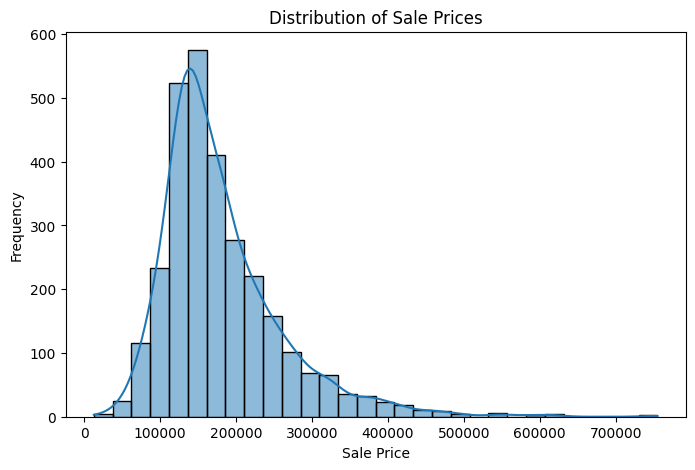

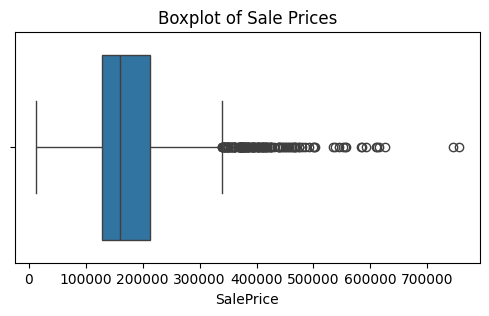

In [14]:
#histogram shows if most houses are in a low price range or if prices are spread out.
# Histogram for SalePrice
plt.figure(figsize=(8, 5))
sns.histplot(data['SalePrice'], bins=30, kde=True)  
# bins=30 → groups data into 30 buckets
# kde=True → adds a smooth curve to show the shape of distribution
plt.title("Distribution of Sale Prices")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()


#Boxplots are very useful to spot skewness and extreme values quickly.
# Boxplot for SalePrice
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['SalePrice'])
plt.title("Boxplot of Sale Prices")
plt.show()


# Histogram → Is the distribution normal, skewed right (long tail to high values), or skewed left?

# Boxplot → How many outliers? Is the median centered or skewed?

## SalePrice is right-skewed (mean > median, skew > 1.0) with ~5% high-value outliers that are plausible; we will keep them but apply a log1p transform to normalize the distribution for modeling.

In [13]:
from file_utils import check_duplicates

duplicates, n_duplicates = check_duplicates(data)
print(f"Number of duplicate rows: {n_duplicates}")
if n_duplicates > 0:
    print(duplicates.head())


Number of duplicate rows: 0


# Export Clean Data

In [18]:
processed_path = os.path.join(PROJECT_ROOT, "data", "processed", "cleaned_data.csv")
os.makedirs(os.path.dirname(processed_path), exist_ok=True) # to make sure dir exist
data.to_csv(processed_path, index= False)  # index=False → means do NOT write the DataFrame index column into the CSV file.

logging.info(f"Cleaned dataset saved to: {processed_path}")
print(f"Cleaned dataset saved to: {processed_path}")

Cleaned dataset saved to: /home/bonson/Desktop/mljourney/tempo/week03/week03_project/eda_dashboard/data/processed/cleaned_data.csv


# Exporting Reports

In [19]:
# Reports directory inside project root
reports_dir = os.path.join(PROJECT_ROOT, "reports")
os.makedirs(reports_dir, exist_ok=True)  # make sure "reports/" exists

# Missing values report
missing_report = missing_values_report(data)
missing_report_path = os.path.join(reports_dir, "missing_values_report.csv")
missing_report.to_csv(missing_report_path)
logging.info(f"Missing values report saved to: {missing_report_path}")
print(f"Missing values report saved to: {missing_report_path}")

# Duplicate rows report
duplicate_rows = data[data.duplicated(keep=False)]
duplicates_path = os.path.join(reports_dir, "duplicates_report.csv")
duplicate_rows.to_csv(duplicates_path, index=False)
logging.info(f"Duplicates report saved to: {duplicates_path}")
print(f"Duplicates report saved to: {duplicates_path}")

# Statistical summary report
summary_report = data.describe().T  # T = transpose for readability
summary_path = os.path.join(reports_dir, "summary_report.csv")
summary_report.to_csv(summary_path)
logging.info(f"Statistical summary report saved to: {summary_path}")
print(f"Statistical summary report saved to: {summary_path}")


Missing values report saved to: /home/bonson/Desktop/mljourney/tempo/week03/week03_project/eda_dashboard/reports/missing_values_report.csv
Duplicates report saved to: /home/bonson/Desktop/mljourney/tempo/week03/week03_project/eda_dashboard/reports/duplicates_report.csv
Statistical summary report saved to: /home/bonson/Desktop/mljourney/tempo/week03/week03_project/eda_dashboard/reports/summary_report.csv
